## Vision Transformers

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image
from io import BytesIO

In [2]:
def load_image_from_url(url):
    response  =  requests.get(url)
    img  = Image.open(BytesIO(response.content))
    return img
    

In [3]:
def load_image_from_file(filepath):
    img = Image.open(filepath)
    return img

In [4]:
def plot_image_with_boxes(image, patch_size = (128,128)):
    image_resized = image.resize((512,512))
    img_array  = np.array(image_resized)
    
    fig, ax = plt.subplots(figsize = (10,10))
    ax.imshow(img_array)
    
    rows,cols = 512 // patch_size[0], 512//patch_size[1]
    patch_count = 0
    
    for i in range(rows):
        for j in range(cols):
            y0, y1 = i*patch_size[0], (i+1)*patch_size[0]
            x0, x1 = j*patch_size[1], (j+1)*patch_size[1]
            rect = plt.Rectangle((x0,y0), x1-x0, y1-y0, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            
            ax.text(x0 + patch_size[1]/2, y0 + patch_size[0]/2, str(patch_count), color ="white", ha = "center", va = "center", fontsize=18, fontweight="bold")
            
            patch_count +=1
            
    plt.axis("off")
    plt.show()
            

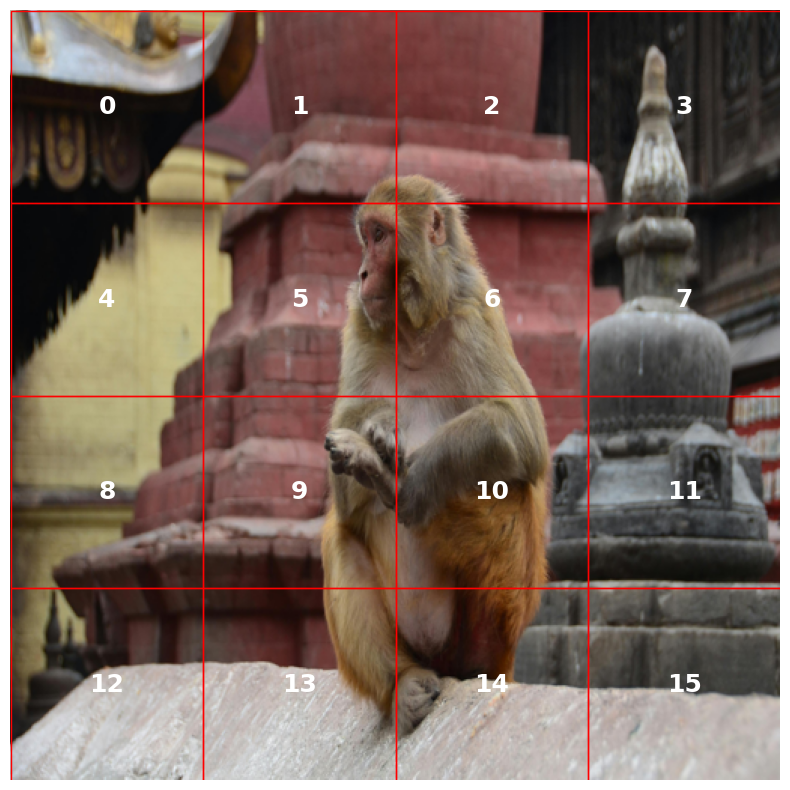

In [5]:
my_image = "../images/test_monkey.jpg"
image = load_image_from_file(my_image)
plot_image_with_boxes(image)

### flatten the image

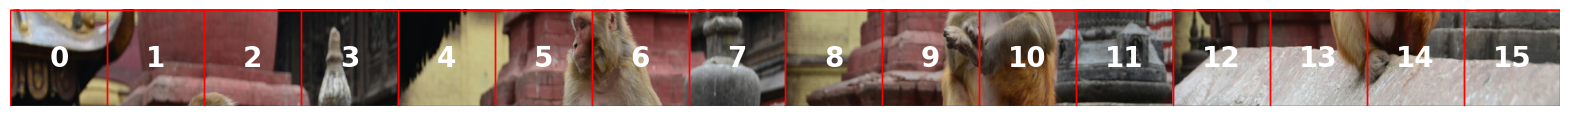

In [6]:
def flatten_image(image, patch_size =(128,128)):
    img_resized = image.resize((512, 512))
    img_array = np.array(img_resized)
    
    patches = []
    
    rows, cols = 512//patch_size[0], 512// patch_size[1]
    
    
    for i in range (rows):
        for j in range (cols):
            y0, y1 = i * patch_size[0], (i + 1) * patch_size[0]
            x0, x1 = j * patch_size[1], (j+1) * patch_size[1]
            
            patch = img_array[y0:y1, x0:x1]
            patches.append(patch)
            
    fig, ax = plt.subplots(figsize =(20,5))
    combined_image = np.hstack(patches)
    
    ax.imshow(combined_image)
    ax.axis("off")
    
    patch_count = 0
    for i in range (len(patches)):
        x0 = i * patch_size[1]
        x1 = (i + 1) * patch_size[1]
        rect = plt.Rectangle((x0, 0), patch_size[1], patch_size[0], edgecolor = "r", facecolor= "none")
        ax.add_patch(rect)
        ax.text(x0 + patch_size[1] / 2, patch_size[0]/ 2, str(patch_count), color="white", ha = "center", va = "center", fontsize = 20, fontweight="bold")
        patch_count +=1
    
    plt.show()

flatten_image(image)
    

Each patch will make a token of length:  49152.




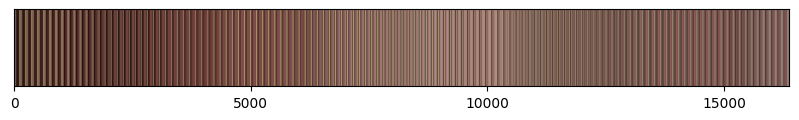

In [7]:
def linear_patching(image, patch_index, patch_size=(128, 128)):
    image_resized = image.resize((512,512))
    img_array = np.array(image_resized)
    
    patches = []
    
    rows, cols = 512 // patch_size[0], 512 // patch_size[1]
    
    for i in range(rows):
        for j in range(cols):
            y0, y1 = i * patch_size[0], (i+1) * patch_size[0]
            x0, x1 = j * patch_size[1], (j+1) * patch_size[1]
            patch = img_array[y0:y1, x0:x1]
            patches.append(patch)
            
    selected_patch = patches[patch_index].reshape(-1,3)
    
    print(f"Each patch will make a token of length:  {str(patch_size[0] * patch_size[1] * 3)}.")
    print("\n")
    
    
    fig = plt.figure(figsize=(10,1))
    plt.imshow(selected_patch[np.newaxis, :, :], aspect="auto")
    plt.xticks(np.arange(0, len(selected_patch), 5000), labels=np.arange(0, len(selected_patch), 5000))
    plt.yticks([])
    plt.show()
    
    
linear_patching(image, patch_index=5)
    